<a href="https://colab.research.google.com/github/NeuromatchAcademy/course-content/blob/day05/W1_D5_Tutorial_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neuromatch Academy 2020 - Dimensionality Reduction
## a. Tutorial 4 - Nonlinear dimensionality reduction

In [0]:
#@title Video: PCAApplications


---

## b. Tutorial objectives
In this notebook we'll explore how dimensionality reduction can be useful for visualizing data and looking for structure. To do this, we will compare PCA with t-SNE, a nonlinear dimensionality reduction method.

Steps:
 1. Visualize MNIST in 2D using PCA.
 2. Visualize MNIST in 2D using t-SNE.
---

Please execute the cell below to initialize the notebook environment.

---
### Imports and helper functions

In [0]:
def change_of_basis(X,W):
  """
  Projects data onto a new basis.
  
  Args:
    X (numpy array of floats) : Data matrix
                                each column corresponding to a different random variable
    W (numpy array of floats):  new orthonormal basis
                                columns correspond to basis vectors
  
  Returns: 
    (numpy array of floats) : Data matrix expressed in new basis
  """
  Y = np.matmul(X,W)
  return Y

def get_sample_cov_matrix(X):
  """
    Returns the sample covariance matrix of data X
    
    Args:
      X (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 
      
    Returns: 
      (numpy array of floats) : Covariance matrix
  """
  X = X - np.mean(X,0)
  cov_matrix = 1./X.shape[0]*np.matmul(X.T,X)
  return cov_matrix


def sort_evals_descending(evals,evectors):
  """
  DO NOT EDIT THIS FUNCTION!
  
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats):   Vector of eigenvalues 
    evectors (numpy array of floats):   Corresponding matrix of eigenvectors 
                                each column corresponds to a different eigenvalue 
    
  Returns: 
    (numpy array of floats) : Vector of eigenvalues after sorting
    (numpy array of floats) : Matrix of eigenvectors after sorting
  """
  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:,index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:,0], 1./np.sqrt(2)*np.array([1,1]))) > np.pi/2.:
      evectors[:,0] = -evectors[:,0]
    if np.arccos(np.matmul(evectors[:,1], 1./np.sqrt(2)*np.array([-1,1]))) > np.pi/2.:
      evectors[:,1] = -evectors[:,1]
  return evals, evectors


def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.
  
  Args:
     X (numpy array of floats):   Data matrix 
                                  each column corresponds to a different random variable 
     
  Returns: 
    (numpy array of floats) : Data projected onto the new basis
    (numpy array of floats) : Vector of eigenvalues
    (numpy array of floats) : Corresponding matrix of eigenvectors 
    
  """
  X = X - np.mean(X,0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eig(cov_matrix)
  evals, evectors = sort_evals_descending(evals,evectors)
  score = change_of_basis(X,evectors)
  return score, evectors, evals

def reconstruct_data(score,evectors,X_mean,K):
  """
  Reconstruct the data based on the top K components.
  
  Args:
     score (numpy array of floats) : Score matrix
     evectors (numpy array of floats) : Matrix of eigenvectors
     X_mean (numpy array of floats) : Vector corresponding to data mean
     K (scalar) : Number of components to include
     
  Returns: 
     (numpy array of floats) : Matrix of reconstructed data 
    
  """
  X_reconstructed = np.matmul(score[:,:K],evectors[:,:K].T) + X_mean
  return X_reconstructed

def visualize_components(component1,component2,labels):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.
  
  Args:
     component1 (numpy array of floats) : Vector of component 1 scores
     component2 (numpy array of floats) : Vector of component 2 scores
     labels (numpy array of floats) : Vector corresponding to categories of samples
     
  Returns: 
     Nothing.
    
  """
  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1,y=component2,c=labels,cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  

In [0]:
# @title
import time                        # import time 
import numpy as np                 # import numpy
import scipy as sp                 # import scipy
import math                        # import basic math functions
import random                      # import basic random number generator functions

import matplotlib.pyplot as plt    # import matplotlib
from IPython import display        

fig_w, fig_h = (10, 4)
plt.rcParams.update({'figure.figsize': (fig_w, fig_h)})
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## c. Visualize MNIST in 2D using PCA.

In this exercise, we'll visualize the first few components of the MNIST dataset to look for evidence of structure in the data. But in this tutorial, we will also be interested in the label of each image (i.e., which numeral it is from 0 to 9). Start by running the following cell to reload the MNIST dataset. 


In [0]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name = 'mnist_784')
X = mnist.data
labels = [int(k) for k in mnist.target]
labels = np.array(labels)

To perform PCA, we now will use the method implemented in sklearn. Run the following cell to set the parameters of PCA - we will only look at the top 2 components because we will be visualizing the data in 2D.

In [4]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=2) # Initializes PCA
pca_model.fit(X) # Performs PCA 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#### Exercise:
Now fill in the code below to perform PCA and visualize the top two  components. For better visualization, take only the first 2000 samples of the data (this will also make t-SNE much faster in the following section of the tutorial so don't skip this step!)

**Suggestions**
* Truncate the data matrix at 2000 samples. You will also need to truncate the array of labels.
* Perform PCA on the truncated data.
* Use the function `visualize_components` to plot the labelled data.
* Examine the results. What do you see? Are different samples corresponding to the same numeral clustered together? Is there much overlap? Do some pairs of numerals appear to be more distinguishable than others?

In [5]:
help(visualize_components)
help(pca_model.transform)

Help on function visualize_components in module __main__:

visualize_components(component1, component2, labels)
    Plots a 2D representation of the data for visualization with categories
    labelled as different colors.
    
    Args:
       component1 (numpy array of floats) : Vector of component 1 scores
       component2 (numpy array of floats) : Vector of component 2 scores
       labels (numpy array of floats) : Vector corresponding to categories of samples
       
    Returns: 
       Nothing.

Help on method fit in module sklearn.decomposition._pca:

fit(X, y=None) method of sklearn.decomposition._pca.PCA instance
    Fit the model with X.
    
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training data, where n_samples is the number of samples
        and n_features is the number of features.
    
    y : None
        Ignored variable.
    
    Returns
    -------
    self : object
        Returns the instance itself.



In [0]:
###################################################################
## Insert your code here to:
##                Take only the first 2000 samples
##                Perform PCA 
##                Plot the data and reconstruction
################################################################### 
# X = ...
# labels = ...
# scores = pca_model.transform(X)
# visualize_components(...)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


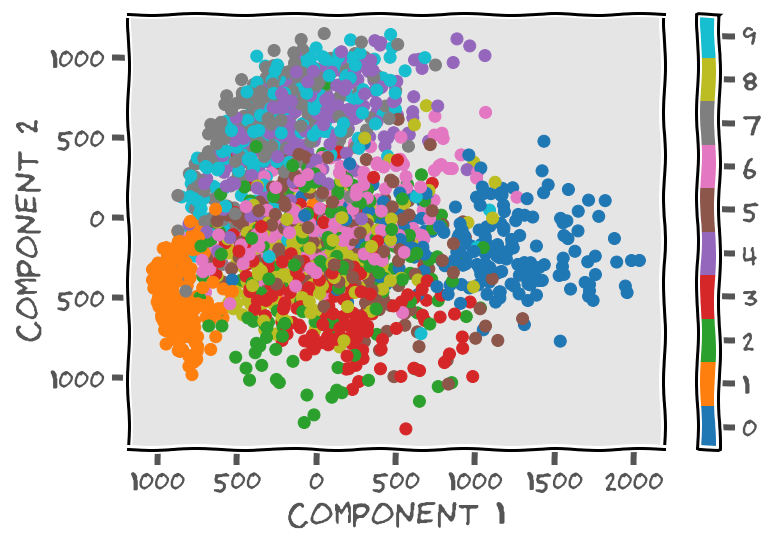

In [7]:
# to_remove solution
X = X[:2000,:]
labels = labels[:2000]

score = pca_model.transform(X)

with plt.xkcd():
  visualize_components(score[:,0],score[:,1],labels)

## d. Visualize MNIST in 2D using t-SNE.


In [0]:
#@title Video: NonlinearMethods

Next we will analyze the same data using t-SNE, a nonlinear dimensionality reduction method that is useful for visualizing high dimensional data in 2D or 3D. Run the cell below to get started. 

In [0]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2,perplexity=30,random_state=0) 


#### Exercise
First, we'll run t-SNE on the data to explore whether we can see more structure. The cell above defined the parameters that we will use to find our embedding (i.e, the low-dimensional representation of the data) and stored them in `model`. To run t-SNE on our data, use the function `model.fit_transform`.


**Suggestions**
* Run t-SNE using the function `model.fit_transform`.
* Plot the result data using `visualize_components`. 
* Do you see clusters corresponding to different numerals? Which clusters are closer together and which are further apart? Does this make intuitive sense to you? Do numerals that look similar have nearby clusters in the t-SNE embedding? (**Hint:** consider similar numerals like 3 and 8).

In [0]:
help(tsne_model.fit_transform)

Help on method fit_transform in module sklearn.manifold._t_sne:

fit_transform(X, y=None) method of sklearn.manifold._t_sne.TSNE instance
    Fit X into an embedded space and return that transformed
    output.
    
    Parameters
    ----------
    X : array, shape (n_samples, n_features) or (n_samples, n_samples)
        If the metric is 'precomputed' X must be a square distance
        matrix. Otherwise it contains a sample per row. If the method
        is 'exact', X may be a sparse matrix of type 'csr', 'csc'
        or 'coo'. If the method is 'barnes_hut' and the metric is
        'precomputed', X may be a precomputed sparse graph.
    
    y : Ignored
    
    Returns
    -------
    X_new : array, shape (n_samples, n_components)
        Embedding of the training data in low-dimensional space.



In [0]:
###################################################################
## Insert your code here to:
##                Visualize the data
################################################################### 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


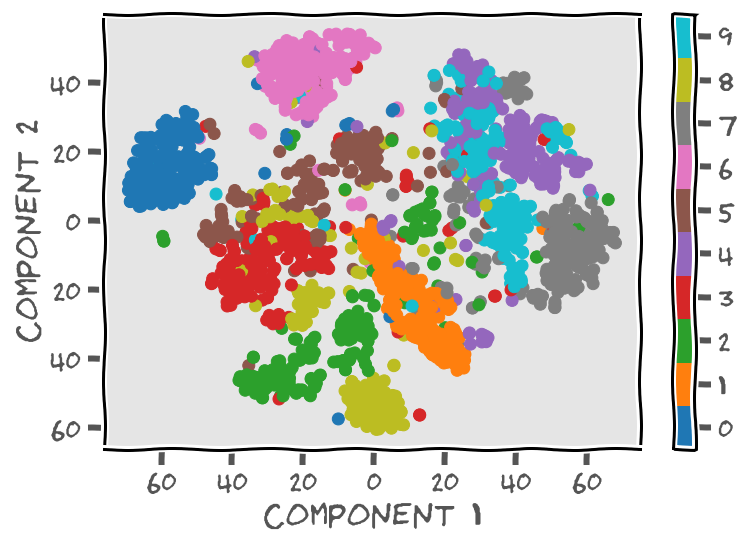

In [9]:
# to_remove solution
embed = tsne_model.fit_transform(X)

with plt.xkcd():
  visualize_components(embed[:,0],embed[:,1],labels)


#### Exercise
Next we'll take a look at some of the parameters of t-SNE and how those affect our interpretation of the results. First we will look at the random seed (the parameter `random_state`). Unlike PCA, t-SNE is not deterministic so different random seeds can give different results. Next, we will look at perplexity, which is a free parameter of t-SNE that roughly determines how global vs. local information is weighted. 

**Suggestions**
* Rerun t-SNE (don't forget to re-initialize using the function `TSNE` as above) with the same perplexity of 30, but now setting the initial seed to 2. 
* What changed compared to your previous results? Do you see any clusters that have a different structure than before? (**Hint:** are clusters for 2 and 8 close together or far apart? Did this change from your initial findings?)
* Now try decreasing the perplexity to 5 and 2. 
* What changed in the embedding structure? 

In [0]:
###################################################################
## Insert your code here to:
##                redefine the t-SNE "model" while setting random_state to 1
##                perform t-SNE on the data and plot the results
##                Repeat, for perplexity = 5, and 2 (set random_state to 0)
################################################################### 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


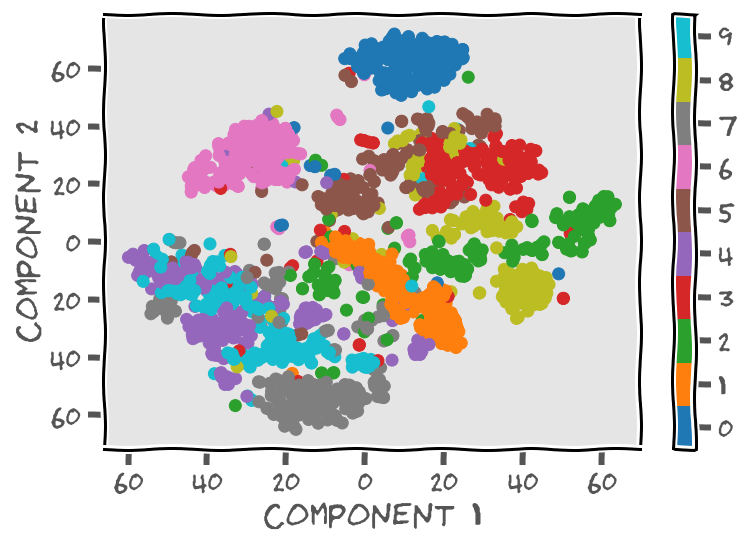

In [10]:
# to_remove solution
tsne_model = TSNE(n_components=2,perplexity=30,random_state=1) 
embed = tsne_model.fit_transform(X)

with plt.xkcd():
  visualize_components(embed[:,0],embed[:,1],labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


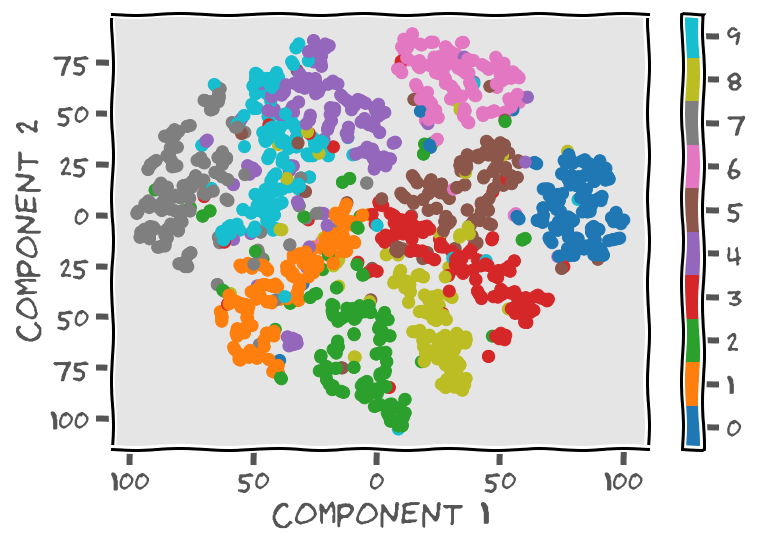

In [11]:
# to_remove solution- PERPLEXITY OF 5
tsne_model = TSNE(n_components=2,perplexity=5, random_state=0) 
embed = tsne_model.fit_transform(X)

with plt.xkcd():
  visualize_components(embed[:,0],embed[:,1],labels)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


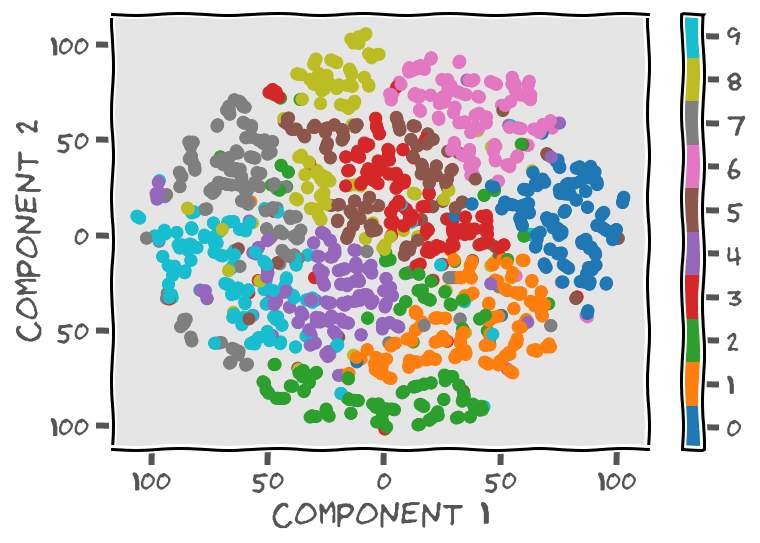

In [12]:
# to_remove solution - PERPLEXITY OF 2
tsne_model = TSNE(n_components=2,perplexity=2, random_state=0) 
embed = tsne_model.fit_transform(X)

with plt.xkcd():
  visualize_components(embed[:,0],embed[:,1],labels)

## e. Further reading

To learn more about the subtleties of interpreting t-SNE results, check out these resources:
* https://distill.pub/2016/misread-tsne/
* https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html
* https://lvdmaaten.github.io/tsne/
